# Genetic Association Testing

This is an example of the workflow analysis used for the genetic association analysis described in https://doi.org/10.1016/j.jdermsci.2023.02.003. After genotyping using TaqMan™ SNP Genotyping Assays, genotypes were obtained for all samples. The genotype distributions of the 3 tag SNPs did not significantly deviate from Hardy-Weinberg Equilibrium in either cases or control groups. Genotypes were successfully called for more than 99% of samples, and the minor allele frequencies in the control groups were consistent with those reported for the East Asian (EAS) population of the 1KGPh3. This evidence reinforces the reliability of the generated data (for further details, please see the article).
    
    
## working files
#### 1. PED
The PED file is a white-space (space or tab) delimited file: the first 6 columns are mandatory:
- Family ID
- Individual ID
- Paternal ID
- Maternal ID
- Sex (1=male; 2=female; other=unknown)
- Phenotype (case=2, control=1)
- Genotypes (column 7 onwards) e.g. A,C,G,T, or 0 for the missing genotype character. All markers should be biallelic.
#### 2. MAP
Each line of the MAP file describes a single marker and must contain exactly 4 columns:
- chromosome (1-22, X, Y or 0 if unplaced)
- rs# or snp identifier
- Genetic distance (morgans)
- Base-pair position (bp units)
#### 3. Phenotype file
It is a file that contains 3 columns (one row per individual):
- Family ID
- Individual ID
- Phenotype: For this example, male cases with hair loss pattern type 2 and male control were selected.
#### 4. Covar file
- Family ID
- Individual ID
- AGE

In [13]:
import pandas as pd

#example of PED file
ped_file = pd.read_csv("SELL_AllSNPs.ped", sep='\s+', header=None)
ped_file.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,10,FAGA_0001,0,0,2,2,C,T,T,T,T,T
1,10,FAGA_0002,0,0,2,2,C,T,A,T,C,T
2,10,FAGA_0003,0,0,2,2,T,T,T,T,C,T
3,10,FAGA_0004,0,0,2,2,T,T,T,T,C,T
4,10,FAGA_0005,0,0,2,2,T,T,A,A,T,T


In [14]:
#example of MAP file
map_file = pd.read_csv("SELL_AllSNPs.map", sep='\t', header=None)
map_file

,0,1,2,3
0,1,rs2223286,0,169696491
1,1,rs2420381,0,169706566
2,1,rs4987349,0,169698838


## Case-control analyses using PLINK (version 1.9)

PLINK (version 1.9) was used to perform logistic regression case-control analyses on the genotypes, assuming additive, dominant, recessive, and 2-degree of freedom (genotypic) models.

For each SNP tagger, the odds ratio (OR), p-value, and 95% confidence interval (CI) were calculated.

Subgroup analyses were performed comparing male pattern hair loss type 2 (pheno_name = MALES_2) against male controls, with age adjustment using the covariate file.

Results with a p-value < 0.05 were considered statistically significant after multiple testing correction

In [19]:
from genetic_assoc_testing import main
main("SELL_AllSNPs", "PHENO_ALL_10Jan2022.txt", "COVAR_1_AGE.txt", pheno_name="MALES_2")

PLINK command for chi-square allelic test has been executed successfully.
PLINK command for association analysis using Fisher's exact test has been executed successfully.
PLINK command for logistic regression, assuming additive model, has been executed successfully.
PLINK command for logistic regression, assuming dominant model, has been executed successfully.
PLINK command for logistic regression, assuming recessive model, has been executed successfully.
PLINK command for logistic regression, assuming genotypic model, has been executed successfully.


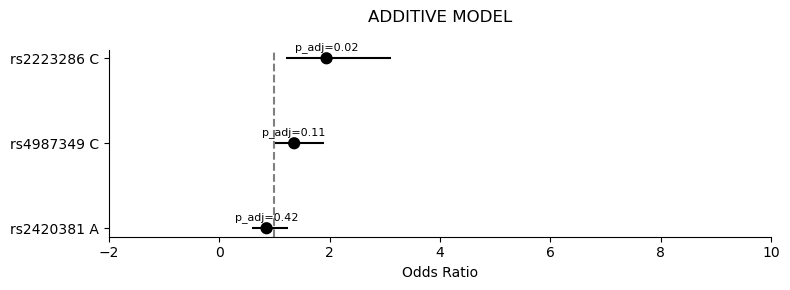

,CHR,SNP,BP,A1,TEST,NMISS,OR,SE,L95,U95,...,P,UNADJ,GC,BONF,HOLM,SIDAK_SS,SIDAK_SD,FDR_BH,FDR_BY,SNP_info
0,1,rs2223286,169696491,C,ADD,521,1.9440,0.2409,1.2120,3.117,...,0.005789,0.005789,0.2960,0.01737,0.01737,0.01727,0.01727,0.01737,0.03184,rs2223286 C
1,1,rs4987349,169698838,C,ADD,517,1.3580,0.1718,0.9701,1.902,...,0.074540,0.074540,0.4995,0.22360,0.14910,0.20740,0.14350,0.11180,0.20500,rs4987349 C
2,1,rs2420381,169706566,A,ADD,518,0.8572,0.1925,0.5879,1.250,...,0.423400,0.423400,0.7618,1.00000,0.42340,0.80830,0.42340,0.42340,0.77630,rs2420381 A


In [1]:
from results_visual import main
additive_df, additive_plot = main('ADDITIVE')
additive_df

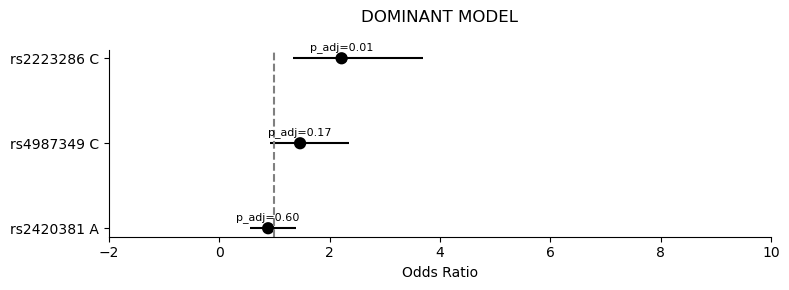

,CHR,SNP,BP,A1,TEST,NMISS,OR,SE,L95,U95,...,P,UNADJ,GC,BONF,HOLM,SIDAK_SS,SIDAK_SD,FDR_BH,FDR_BY,SNP_info
0,1,rs2223286,169696491,C,DOM,521,2.2170,0.2611,1.3290,3.698,...,0.002295,0.002295,0.1961,0.006886,0.006886,0.006871,0.006871,0.006886,0.01263,rs2223286 C
1,1,rs4987349,169698838,C,DOM,517,1.4650,0.2398,0.9157,2.345,...,0.111200,0.111200,0.4995,0.333600,0.222400,0.297900,0.210000,0.166800,0.30580,rs4987349 C
2,1,rs2420381,169706566,A,DOM,518,0.8862,0.2325,0.5618,1.398,...,0.603300,0.603300,0.8256,1.000000,0.603300,0.937600,0.603300,0.603300,1.00000,rs2420381 A


In [2]:
dominant_df, dominant_plot = main('DOMINANT')
dominant_df

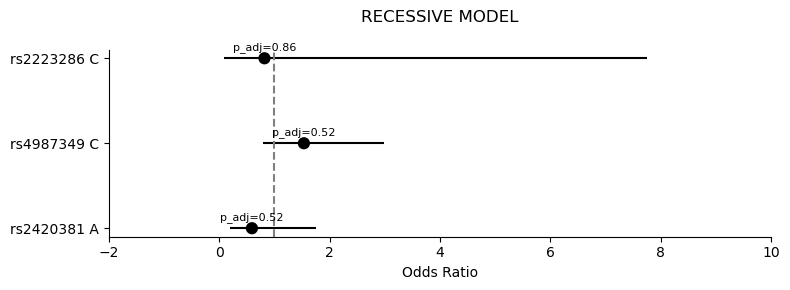

,CHR,SNP,BP,A1,TEST,NMISS,OR,SE,L95,U95,...,P,UNADJ,GC,BONF,HOLM,SIDAK_SS,SIDAK_SD,FDR_BH,FDR_BY,SNP_info
0,1,rs2223286,169696491,C,REC,521,0.8196,1.1460,0.08677,7.742,...,0.8622,0.8622,0.9014,1.0000,0.8622,0.9974,0.8622,0.8622,1.000,rs2223286 C
1,1,rs4987349,169698838,C,REC,517,1.5340,0.3393,0.78890,2.983,...,0.2073,0.2073,0.3682,0.6219,0.6219,0.5019,0.5019,0.5160,0.946,rs4987349 C
2,1,rs2420381,169706566,A,REC,518,0.5925,0.5532,0.20040,1.752,...,0.3440,0.3440,0.4995,1.0000,0.6880,0.7177,0.5697,0.5160,0.946,rs2420381 A


In [3]:
recessive_df, recessive_plot = main('RECESSIVE')
recessive_df